<a href="https://colab.research.google.com/github/ulil1401/MyData/blob/main/5025231125_Ulil%20Amry%20Ghovary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kagglehub import KaggleDatasetAdapter
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/ulil1401/MyData/refs/heads/main/netflix_movies_detailed_up_to_2025.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1440286,Movie,Festival de Viña del Mar 2025: Ha*Ash,NaN,Ha*ash,Chile,2025-02-24,2025,0.000,NaN,Music,es,NaN,4.931,0,0.000,0,0
15996,1271724,Movie,Man and Woman,Vladimir Kott,"Anna Kotova, Stepan Devonin, Pavel Derevyanko,...",Russia,2025-03-13,2025,0.000,NaN,Drama,ru,Poignant stories about men and women who have ...,4.930,0,0.000,0,0
15997,1426364,Movie,Night of the Dead Sorority Babes,"Angel Nichole Bradford, Steve Hermann","Jessa Flux, Lynn Lowry, Angel Nichole Bradford...",NaN,2025-01-28,2025,1.000,NaN,Horror,en,Two villainous entities initiate gorgeous soro...,4.922,1,1.000,0,0
15998,1411248,Movie,A Dunces Burden,Daniel Kowal,"Riley G, Mitchel Corrado",NaN,2025-03-10,2025,0.000,NaN,NaN,en,A Dunces Burden,4.921,0,0.000,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [36]:
df =  df.iloc[:1000][['rating', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  1000 non-null   int64  
 1   rating        1000 non-null   float64
 2   popularity    1000 non-null   float64
 3   vote_count    1000 non-null   int64  
 4   vote_average  1000 non-null   float64
 5   budget        1000 non-null   int64  
 6   revenue       1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [38]:
df.columns = df.columns.str.strip()
df

,release_year,rating,popularity,vote_count,vote_average,budget,revenue
0,2010,6.380,203.893,7449,6.380,165000000,752600867
1,2010,8.369,156.242,37119,8.369,160000000,839030630
2,2010,7.744,121.191,19327,7.744,250000000,954305868
3,2010,7.600,111.762,11638,7.600,260000000,592461732
4,2010,7.800,110.044,13259,7.800,165000000,494879471
...,...,...,...,...,...,...,...
995,2010,6.400,3.875,34,6.400,0,0
996,2010,3.500,3.874,25,3.500,0,0
997,2010,7.200,3.871,20,7.200,0,0
998,2010,4.600,3.863,17,4.600,0,0


In [39]:
df.describe()

,release_year,rating,popularity,vote_count,vote_average,budget,revenue
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,2010.0,6.117993,12.076429,763.432000,6.117993,1.017728e+07,2.526219e+07
std,0.0,1.020792,15.184698,2331.101302,1.020792,2.860188e+07,9.404689e+07
min,2010.0,0.000000,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2010.0,5.500000,5.287750,53.000000,5.500000,0.000000e+00,0.000000e+00
50%,2010.0,6.200000,7.682500,121.500000,6.200000,0.000000e+00,0.000000e+00
75%,2010.0,6.800000,12.410000,417.250000,6.800000,6.000000e+06,5.000000e+06
max,2010.0,10.000000,203.893000,37119.000000,10.000000,2.600000e+08,1.067316e+09


In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

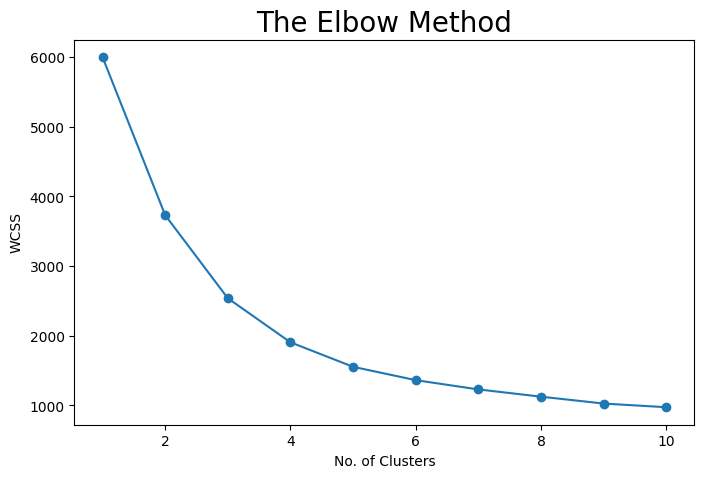

In [43]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

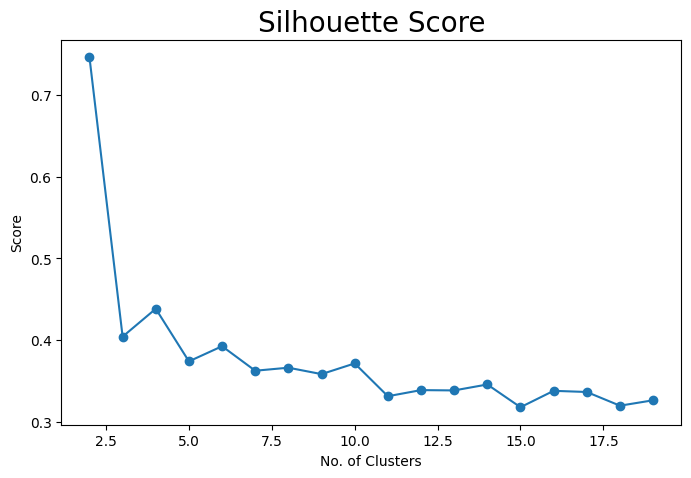

Silhouette Score for K-Means: 0.4045


In [57]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), scores, marker='o', linestyle='-')
plt.title('Silhouette Score', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")


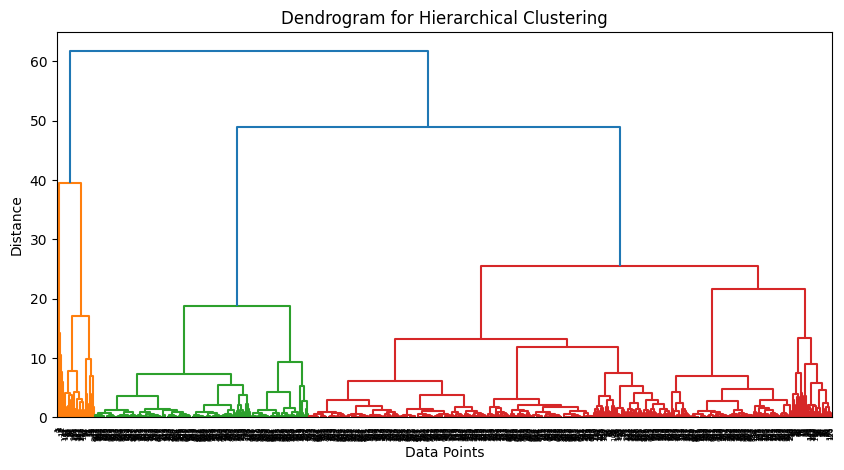

In [58]:
linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [60]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)


In [62]:
silhouette_hierarchical = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")

Silhouette Score for Hierarchical Clustering: 0.4173


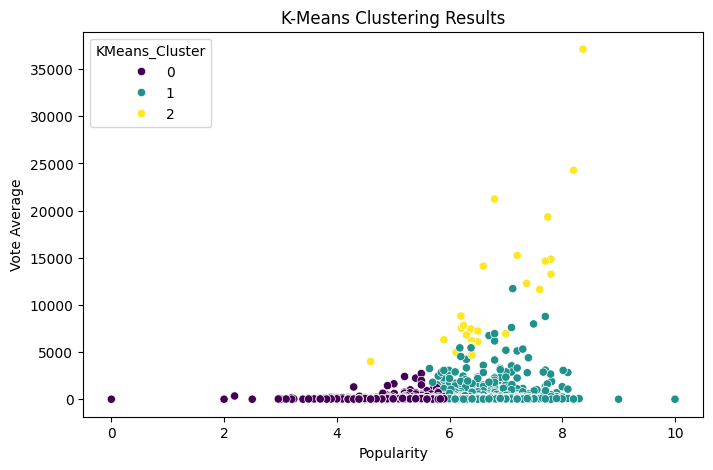

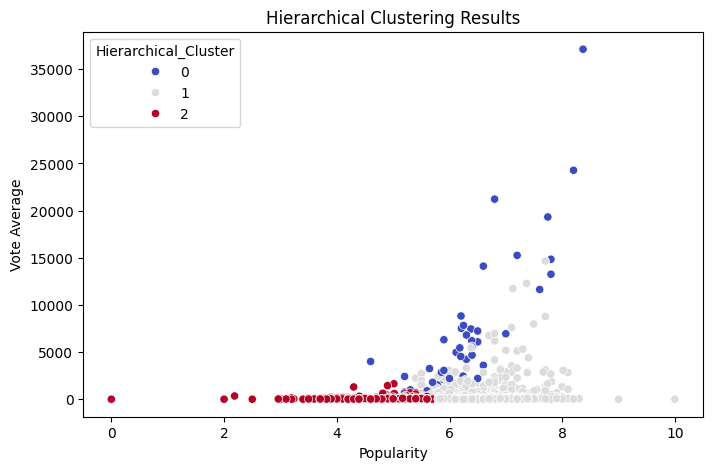

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=df['vote_count'], x=df['vote_average'], hue=df['KMeans_Cluster'], palette="viridis")
plt.title("K-Means Clustering Results")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(y=df['vote_count'], x=df['vote_average'], hue=df['Hierarchical_Cluster'], palette="coolwarm")
plt.title("Hierarchical Clustering Results")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.show()